In [1]:
import seaborn as sns
import pandas as pd
import numpy as np


In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df[df['species']!='setosa']

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN


In [9]:
### split dataset into independant and dependant feature
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
Name: species, Length: 150, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(   
    x, y, test_size=0.25, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [14]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elesticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [15]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [16]:
import numpy as np
nan_indices = np.isnan(y_train)
print("Number of NaN values in y_train:", np.sum(nan_indices))

Number of NaN values in y_train: 35


In [19]:
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]

C:\Users\priya\AppData\Local\Temp\ipykernel_16528\3902938482.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train = X_train[~nan_indices]


In [20]:
classifier_regressor.fit(X_train,y_train)

C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\priya\App

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elesticnet']},
             scoring='accuracy')

In [21]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [22]:
print(classifier_regressor.best_score_)

0.9208333333333334


In [23]:
### prediction
y_pred=classifier_regressor.predict(X_test) 

In [24]:
### accuracy score 
from sklearn.metrics import accuracy_score,classification_report

In [26]:
print("y_pred shape:", y_pred.shape)
print("y_test shape:", y_test.shape)

y_pred shape: (38,)
y_test shape: (38,)


In [27]:
import numpy as np
print("NaN values in y_pred:", np.isnan(y_pred).any())
print("NaN values in y_test:", np.isnan(y_test).any())

NaN values in y_pred: False
NaN values in y_test: True


In [28]:
print("y_pred:", y_pred)
print("y_test:", y_test)

y_pred: [0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
y_test: 73     0.0
18     NaN
118    1.0
78     0.0
76     0.0
31     NaN
64     0.0
141    1.0
68     0.0
82     0.0
110    1.0
12     NaN
36     NaN
9      NaN
19     NaN
56     0.0
104    1.0
69     0.0
55     0.0
132    1.0
29     NaN
127    1.0
26     NaN
128    1.0
131    1.0
145    1.0
108    1.0
143    1.0
45     NaN
30     NaN
22     NaN
15     NaN
65     0.0
11     NaN
42     NaN
146    1.0
51     0.0
27     NaN
Name: species, dtype: float64


In [36]:
score=accuracy_score(y_pred,y_test)
print(score)

C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.

In [38]:
print(classification_report(y_pred,y_test))

C:\Users\priya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.

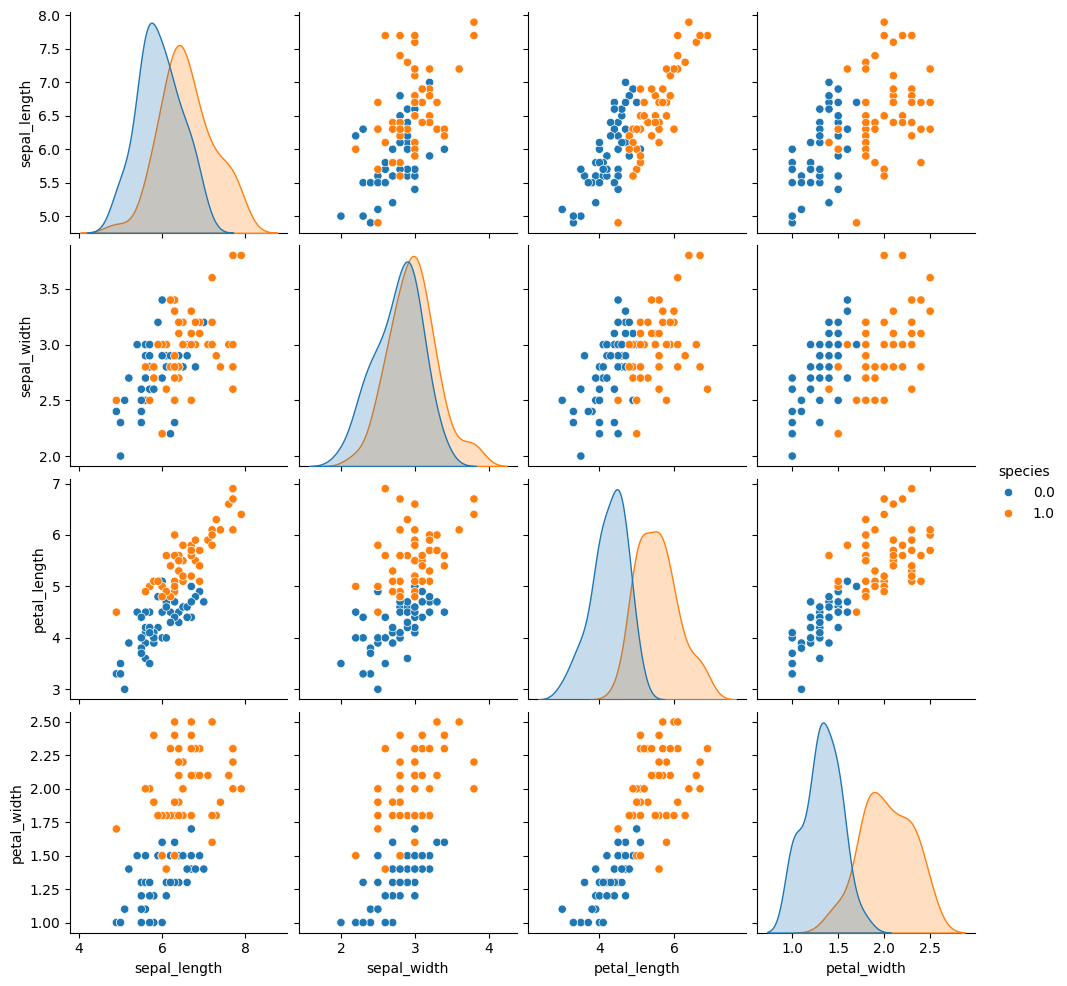

In [37]:
## EDA
sns.pairplot(df,hue ='species')

In [39]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.494305
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,0.308080
petal_length,0.871754,-0.428440,1.000000,0.962865,0.786424
petal_width,0.817941,-0.366126,0.962865,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000
